In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pricing_environment import Two_items_PricingEnvironment
from pricing_agent import GPUCB

In [2]:
n_cust=100

f1=lambda x,y,noise=0.1: np.clip(1-0.2*(3*x**2+y**3)+noise*np.random.normal(0,noise),0,1)
f2=lambda x,y,noise=0.1: np.clip(1-0.5*(0.5*np.cos(x)+2*np.sin(y))+noise*np.random.normal(0,noise),0,1)
f=lambda x,y,c1,c2,noise=0.1: f1(x,y,noise)*(x-c1)+f2(x,y,noise)*(y-c2)

x=np.linspace(0,1,10)
y=np.linspace(0,1,10)
X,Y=np.meshgrid(x,y)

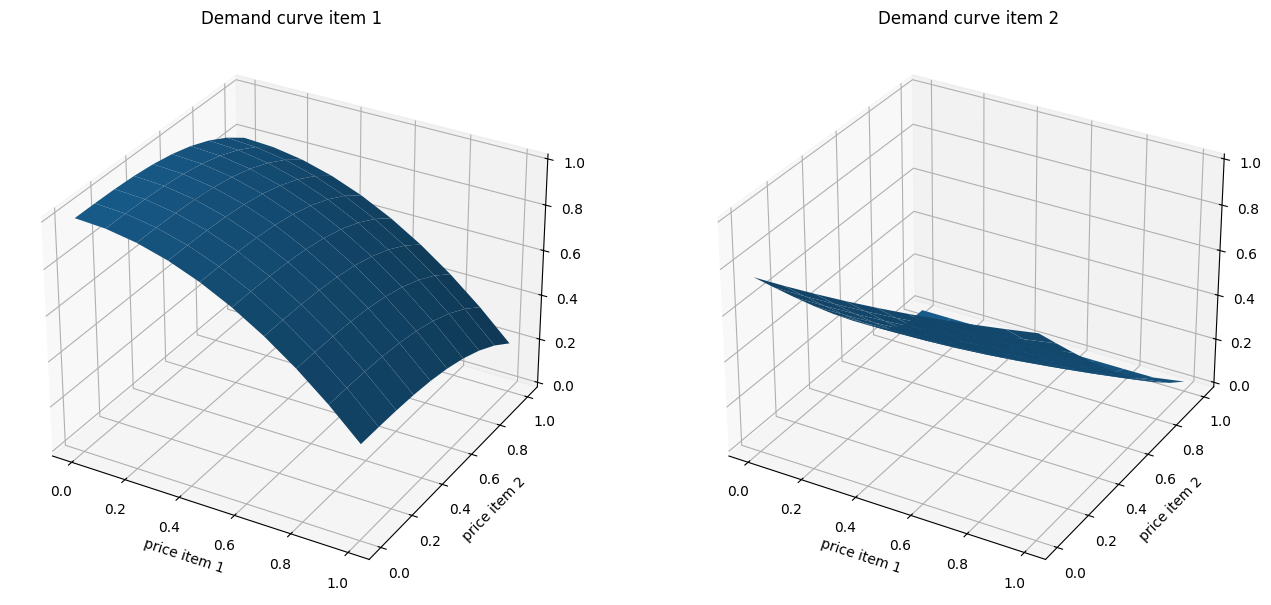

In [3]:
dem1=f1(X,Y,noise=0)
fig=plt.figure(figsize=(16,9))
ax=fig.add_subplot(121,projection='3d')
ax.plot_surface(X,Y,dem1)
ax.set_xlabel('price item 1')
ax.set_ylabel('price item 2')
ax.set_title('Demand curve item 1')
ax.set_zlim(zmin=0,zmax=1)

dem2=f2(X,Y,noise=0)
ax=fig.add_subplot(122,projection='3d')
ax.plot_surface(X,Y,dem2)
ax.set_xlabel('price item 1')
ax.set_ylabel('price item 2')
ax.set_title('Demand curve item 2')
ax.set_zlim(zmin=0,zmax=1)


plt.show()

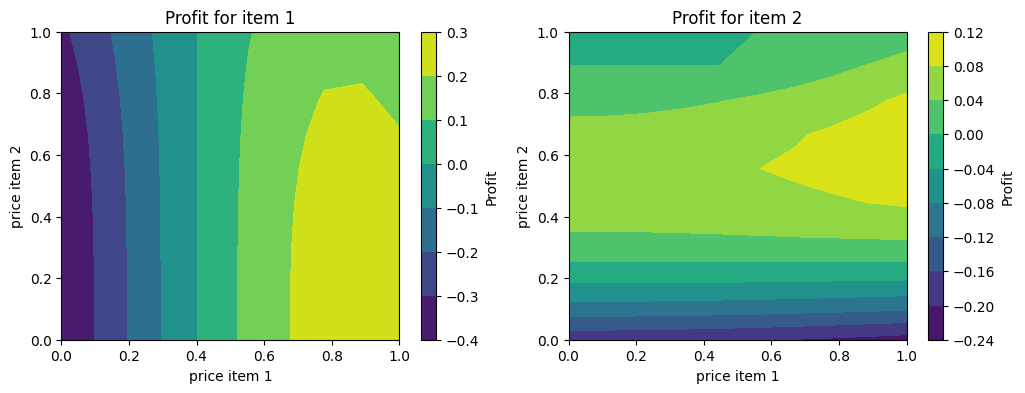

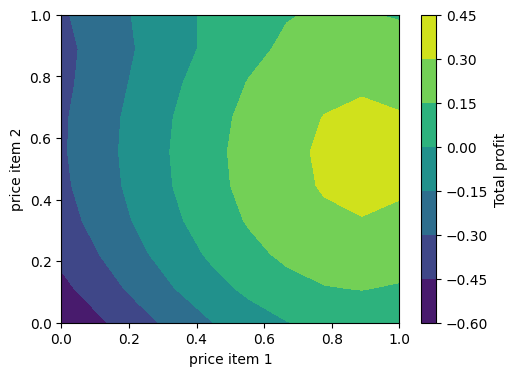

In [4]:
c1=0.4
c2=0.25

fig=plt.figure(figsize=(12,4))

profit_i1=f1(X,Y,noise=0)*(X-c1)
ax=fig.add_subplot(121)
ax.set_title('Profit for item 1')
cp=ax.contourf(X,Y,profit_i1)
plt.colorbar(cp,label='Profit')
plt.xlabel('price item 1')
plt.ylabel('price item 2')

profit_i2=f2(X,Y,noise=0)*(Y-c2)
ax=fig.add_subplot(122)
ax.set_title('Profit for item 2')
cp=ax.contourf(X,Y,profit_i2)
plt.colorbar(cp,label='Profit')
plt.xlabel('price item 1')
plt.ylabel('price item 2')

fig=plt.figure(figsize=(12,4))
tot_profit=f(X,Y,c1,c2,0)
ax=fig.add_subplot(121)
cp=ax.contourf(X,Y,tot_profit)
plt.colorbar(cp,label='Total profit')
plt.xlabel('price item 1')
plt.ylabel('price item 2')
plt.show()

In [5]:
args=np.unravel_index(np.argmax(tot_profit),tot_profit.shape)
best_p1=x[args[1]]
best_p2=x[args[0]]
print(f'Best price p1: {best_p1.round(2)},best price p2: {best_p2.round(2)}\nBest profit: {f(best_p1,best_p2,c1,c2,0).round(2)}')

Best price p1: 0.89,best price p2: 0.56
Best profit: 0.34


In [6]:
env=Two_items_PricingEnvironment(f1,f2,c1,c2)

In [129]:
n1,n2,pr1,pr2=env.round(best_p1,best_p2,n_cust)
n1,n2,pr1,pr2,pr1+pr2

(51, 31, 25.448484848484853, 7.75, 33.19848484848485)

In [2]:
prova=np.linspace(0,1,10)
agent=GPUCB(100,prova,prova)